# Presentacion de resultados proyecto #1
## Realizado por:
- Augusto Alonso - 181085
- Joohno Molina - 18096
- Mario Sarmientos - 17055

In [1]:
#Install all dependencies
!pip install plotly
!pip install pyreadstat
!pip install seaborn
!pip install xlrd==1.2.0
!pip install sklearn
!pip install yellowbrick
!pip install scipy
!pip install numpy
!pip install statsmodels
!pip install pandas
!pip install graphviz

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


# Dependencias
Procederemos a importar todas las dependencias que utilizaremos para nuestros modelos e analisis de los mismos

In [4]:
#impoport dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyreadstat
import numpy as np
import plotly.express as px
from sklearn import tree
import csv
import time
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
import statsmodels.api as sm
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix
import scipy.stats as stats
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier


# Preparacion
Procederemos a preparar nuestro data set para que pueda ser legible por nuestros modelos y dejaremos unicamente los campos que nos son utiles

In [5]:
years_range = range(2009,2020)
data_prefix_path = "Data/defunciones"
lista = []
nombres = ['Depreg', 'Mupreg', 'Mesreg', 'Añoreg', 'Depocu', 'Mupocu', 'Areag',
       'Sexo', 'Diaocu', 'Mesocu', 'Añoocu', 'Edadif', 'Perdif', 'Getdif',
       'Ecidif', 'Ocudif', 'Dnadif', 'Mnadif', 'Nacdif', 'Dredif', 'Mredif',
       'Caudef', 'Asist', 'Ocur', 'Cerdef', 'year']
palabras = ['mupreg', 'mupocu','añoocu', 'Escodif', 'mnadif i in columnas:if', 'Pnadif', 'Predif', 'Puedif', 'Ciuodif',
       'caudef.descrip']

Procedemos a cargar nuestra información iterando en los años y cargando las columnas

In [6]:
for k in years_range:
    #We load the .sav file
    path = data_prefix_path + str(k) + ".sav"
    df, meta = pyreadstat.read_sav(path)
    columnas = df.columns
    columnas = list(columnas) 
    for i in columnas:
        if i in palabras:
            for j in nombres:
                
                if i.lower() == j.lower():
                    df = df.rename(columns={i: j})
    df["year"] = k
    lista.append(df)

Creamos nuestro data set en pandas y vemos que columnas tenemos ya que definitivamente tendremos que eliminar varias

In [8]:
#We create our data set with an appropiate name
defunciones = pd.concat(lista)
defunciones = defunciones
defunciones.shape
defunciones.columns

Index(['Depreg', 'Mupreg', 'Mesreg', 'Añoreg', 'Depocu', 'Mupocu', 'Areag',
       'Sexo', 'Diaocu', 'Mesocu', 'Añoocu', 'Edadif', 'Perdif', 'Getdif',
       'Ecidif', 'Ocudif', 'Dnadif', 'Mnadif', 'Nacdif', 'Dredif', 'Mredif',
       'Caudef', 'Asist', 'Ocur', 'Cerdef', 'year', 'Escodif', 'Pnadif',
       'Predif', 'Puedif', 'Ciuodif', 'caudef.descrip'],
      dtype='object')

No necesitamos
- Mupreg -> Municipio de registro 
- Mesreg -> Mes de registro 
- Añoreg -> Año de registro 
- Depocu -> Departamento ocurrencia
- Mupocu -> Municpio ocurrencia
- Areag 
- caudef.descrip -> Descripción de la causa
- year -> Año
- Diaocu -> Día de ocurrencia
- Añoocu -> Año de ocurrencia
- Nacdif -> Nacimiento del difunto
- Ciuodif -> Ciudad del difunto

In [9]:
#We are gonna drop columns we dont need
#No necesitamos el municipio de registro
#No necesitamos el Mes ni año
#No necesitamos el Mes ni año
#El año no es un factor
#Mredif municipio residencia

defunciones = defunciones.drop(
    [
        'Mupreg', 'Mesreg', 'Añoreg', 'Depocu', 'Mupocu', 'Areag', 'caudef.descrip', 'year', 
        'Diaocu', 'Añoocu', 'Nacdif', 'Cerdef', 'Ciuodif', 'Puedif', 'Mnadif', 'Nacdif', 'Ecidif', 'Perdif',
        'Dnadif', 'Dredif'
    ], axis=1
)


Creamos una funcion que nos permitira poder pasar vairables cualitativas como factor con un diccionario

In [ ]:
map_values = lambda mapped: lambda x: mapped[x] 
defunciones.columns

Procedemos a visualizar como se comporta la causa de defunción ya que hay mas de 1000 causas y no todas nos interesan de igual manera para esto crearemos una gráfica de barras para poder visualizar los resultados

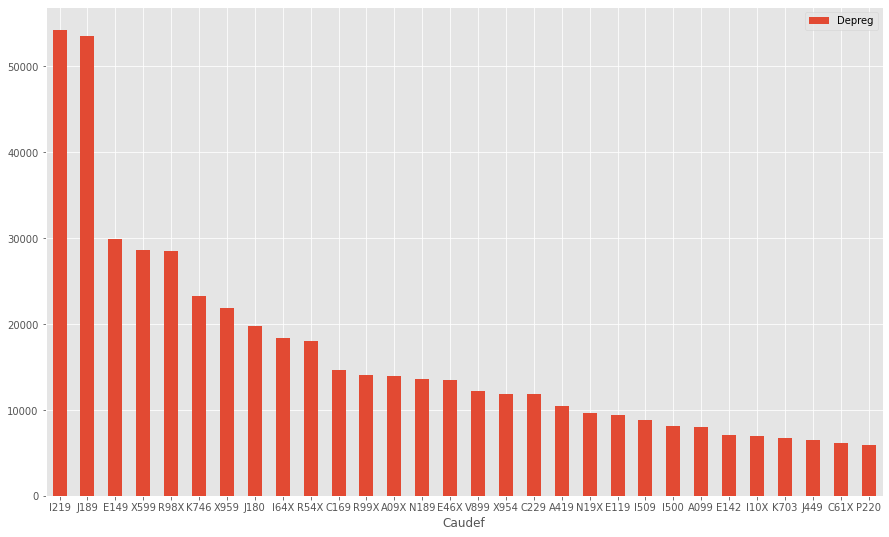

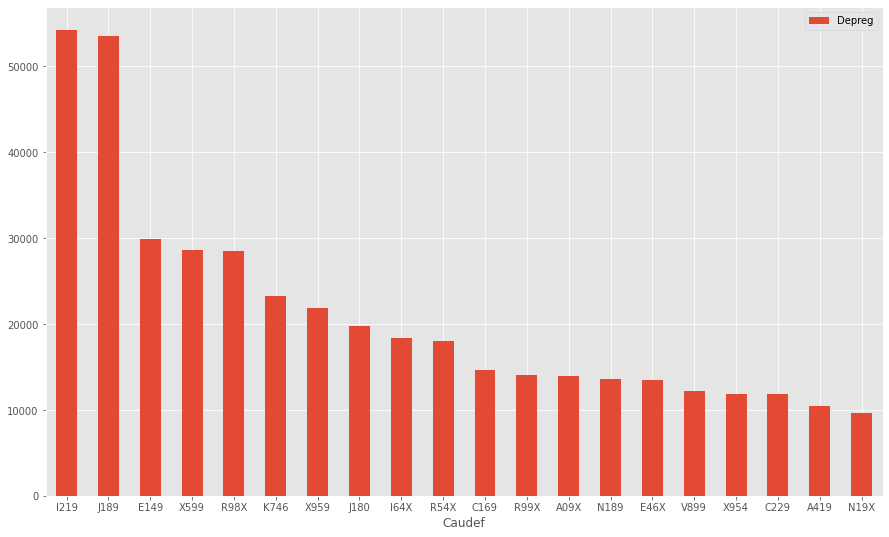

In [41]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')
df_res_d = defunciones.groupby('Caudef').count()
df_res_d = df_res_d.sort_values('Depreg', ascending=False).head(30)
ax = df_res_d.plot.bar(y='Depreg', rot=0)
ax_2 = df_res_d.head(20).plot.bar(y='Depreg', rot=0)

### Observaciones de la Causa de defunción
Como podemos observar en las gráficas de arriba notamos que luego de la 10ma causa de muerte ya la cantidad es menos de 1500 y se convierten la minoria por eso es que decidimos que no eran relevantes para nuestro dataset

A continuación procederemos a filtrar unicamente los datos que nos interesan en base a la causa de defunción.
Y mappeamos los valores para poder tener un valor númerico que los represente

In [42]:
# Tomaremos las 10 enfermedades mas comunes
df_res = defunciones.groupby('Caudef').count()
df_res = df_res.sort_values('Depreg', ascending=False).head(10)
#Solo jalamos el top 10 de enfermedades ya que ocupan casi todo
mapped_v = {
    'I219': 0,#Infarto agudo del miocardio, sin otra especificación
        'J189': 1,#Neumonía, no especificada
        'E149': 2,#Diabetes mellitus no especificada, sin mención de complicación
        'X599': 3,#Exposición a factores no especificados que causan otras lesiones y las no especificadas 
        'R98X': 4,#Muerte sin asistencia
        'K746': 5,#Otras cirrosis del hígado y las no especificadas
        'X959': 6,#Agresión con disparo de otras armas de fuego, y las no especificadas, lugar no especificado
        'J180': 7,#Bronconeumonía, no especificada
        'I64X': 8,#Accidente vascular encefálico agudo, no especificado como hemorrágico o isquémico
        'R54X': 9,#Senilidad
}
defunciones = defunciones[(defunciones.Caudef == 'I219') 
                  | (defunciones.Caudef == 'J189')
                  | (defunciones.Caudef == 'E149')
                  | (defunciones.Caudef == 'X599')
                  | (defunciones.Caudef == 'R98X')
                  | (defunciones.Caudef == 'K746')
                  | (defunciones.Caudef == 'X959')
                  | (defunciones.Caudef == 'J180')
                  | (defunciones.Caudef == 'I64X')
                  | (defunciones.Caudef == 'R54X')
                 ]
# df_res
defunciones['Caudef'] = defunciones['Caudef'].apply(map_values(mapped_v))

In [43]:
defunciones.Caudef

2        6
7        6
8        3
9        3
25       0
        ..
83055    8
83062    0
83065    1
83068    3
83070    0
Name: Caudef, Length: 296277, dtype: int64

La escolaridad de los difuntos solo tiene valores númericos pero para pandas son textos procedemos a cambairles el valor para poder utilizarlos en nuestro modelo

In [44]:
#Normalizaremos las escolaridades
defunciones['Escodif'] = defunciones['Escodif'].apply(lambda x: float(x))

Quitamos las defunciones que tengan ocupaciones no validas.

In [45]:
#Temovemos las ocupaciones no validas
defunciones = defunciones[defunciones.Ocudif != '9999']

La ocupación del difunto tambien es un valor cualitativo por ende queremos ver los que mas se repiten y tratar los que nos interesan como factores

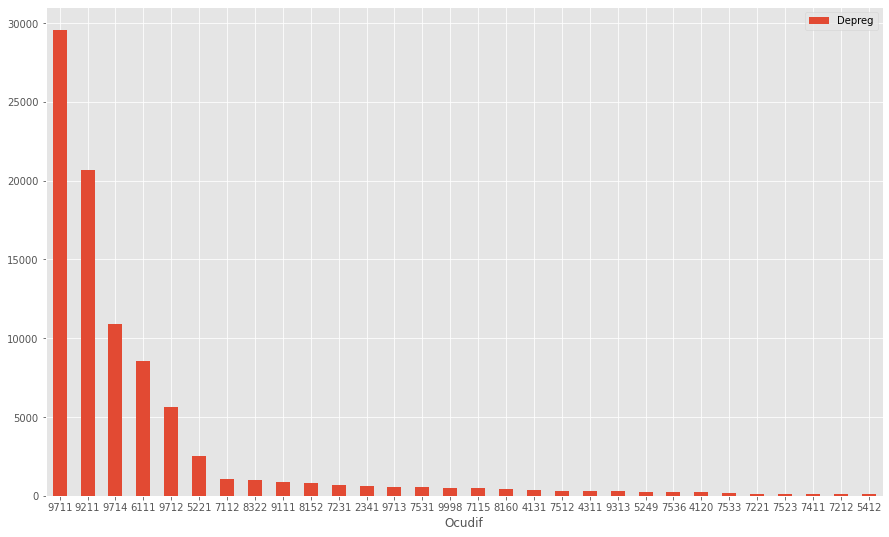

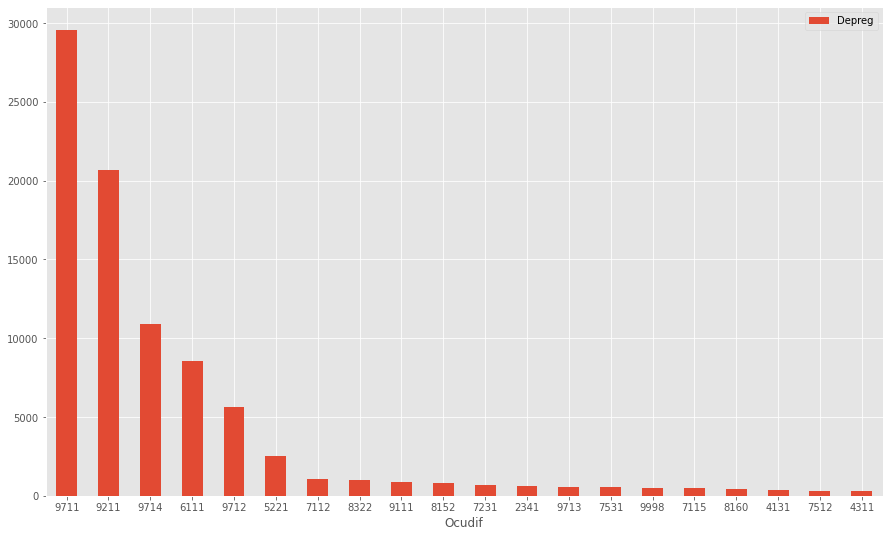

In [46]:
df_res_ocu_d = defunciones.groupby('Ocudif').count()
df_res_ocu_d = df_res_ocu_d.sort_values('Depreg', ascending=False).head(30)
ax = df_res_ocu_d.plot.bar(y='Depreg', rot=0)
ax_2 = df_res_ocu_d.head(20).plot.bar(y='Depreg', rot=0)

### Observaciónes
Aca notamos que en las primeras 10 ocupaciones se acumula la mayor parte de nuestra muestra. De la septima a la decima son bastante parecidas las muestras y en adelante se reduce aun mas la cantidad lo consideramos despreciable.

Procedemos a filtrar únicamente las ocupaciones que nos interesan. Y mappeamos los valores a factores

In [47]:

df_res_ocu = defunciones.groupby('Ocudif').count()
df_res_ocu = df_res_ocu.sort_values('Depreg', ascending=False).head(10)
# Ocudif
mapped_v = {
    '9711': 0,#Oficios domésticos no remunerados
        '9211': 1,# Peones de explotaciones agrícolas
        '9714': 2,# Sin ocupación infante
        '6111': 3,# Agricultores y trabajadores calificados de cultivos extensivos
        '9712': 4,# Estudiante
        '5221': 5,# Comerciantes de tiendas
        '7112': 6,# Albañiles
        '8322': 7,# Conductores de automóviles, taxis y camionetas
        '9111': 8,# Limpiadores y asistentes domésticos
        '8152': 9,# Operadores de telares y otras máquinas tejedoras
}
df_res_ocu
defunciones = defunciones[(defunciones.Ocudif == '9711') 
                  | (defunciones.Ocudif == '9211')
                  | (defunciones.Ocudif == '9714')
                  | (defunciones.Ocudif == '6111')
                  | (defunciones.Ocudif == '9712')
                  | (defunciones.Ocudif == '5221')
                  | (defunciones.Ocudif == '7112')
                  | (defunciones.Ocudif == '8322')
                  | (defunciones.Ocudif == '9111')
                  | (defunciones.Ocudif == '8152')
                 ]
defunciones['Ocudif'] = defunciones['Ocudif'].apply(map_values(mapped_v))

Dentro de nuestro data set procedemos a observar las defunciones que son validas y las que no lo son para ver si es viable utulizar esta columna como variable de respuesta

In [48]:
invalid_deaths = defunciones[defunciones.Edadif==999].Edadif
#.shape[0]
valid_deaths = defunciones[defunciones.Edadif!=999].Edadif
print("El numero de elementos disponibles dentro de nuestro data set son :", defunciones.shape[0])
print("El numero de elementos con información invalida (edad == 999) es:", invalid_deaths.shape[0])
print("El numero de elementos con información valida (edad != 999) es:", valid_deaths.shape[0])
print("El porcentaje aprovechable de nuestro data set es: ", (valid_deaths.shape[0]/defunciones.shape[0]) * 100, "%")

El numero de elementos disponibles dentro de nuestro data set son : 81545
El numero de elementos con información invalida (edad == 999) es: 342
El numero de elementos con información valida (edad != 999) es: 81203
El porcentaje aprovechable de nuestro data set es:  99.58059966889448 %


Como podemos observar arriba:<br>
`
El numero de elementos disponibles dentro de nuestro data set son : 81545
El numero de elementos con información invalida (edad == 999) es: 342
El numero de elementos con información valida (edad != 999) es: 81203
El porcentaje aprovechable de nuestro data set es:  99.58059966889448 %
`<br>
Nuestra muestra es el 99% de los posibles elementos en nuestro data set lo cual nos permitira tener un modelo fiable.

In [49]:
defunciones = defunciones[defunciones.Edadif!=999]
#Process our N/A vairables
data = defunciones.fillna(0)
data.describe()

,Depreg,Sexo,Mesocu,Edadif,Getdif,Ocudif,Caudef,Asist,Ocur,Escodif,Pnadif,Predif
count,81203.000000,81203.000000,81203.000000,81203.000000,81203.000000,81203.000000,81203.000000,81203.000000,81203.000000,81203.000000,81203.000000,81203.000000
mean,9.792865,1.446966,6.430723,56.097780,3.963684,1.607982,3.520633,3.386033,4.473591,1.303289,82.180855,81.659385
std,6.567169,0.497183,3.439103,28.987187,3.533156,1.901816,2.935147,1.677548,1.919933,2.436364,202.723776,190.162546
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,3.000000,33.000000,1.000000,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000
50%,10.000000,1.000000,6.000000,64.000000,2.000000,1.000000,3.000000,4.000000,4.000000,0.000000,0.000000,0.000000
75%,14.000000,2.000000,9.000000,80.000000,9.000000,3.000000,6.000000,5.000000,6.000000,1.000000,0.000000,0.000000
max,22.000000,2.000000,12.000000,129.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9999.000000,9999.000000


De nuestra data observamos que aun hay columnas con valores `9999` que es no aplica o inválido procedemos a terminar de limpiar nuestro data set de estos valores

In [50]:
#Remover 9999
data = data[(data.Pnadif != 9999) & (data.Predif != 9999)]

Se decidio llenar los vacios con 0 Puesto que si la columna es categórica entonces no habría problema
porque a la hora de contar no se categorizaría al elemento.
Ademas observamos que que la asistencia, Ocurrencia, Escolaridad, Pais de residencia y Pais de nacionalidad tienen 9999 que es que falta la informacion falta limpiar eso

In [51]:
data.Edadif.describe()
data.columns

Index(['Depreg', 'Sexo', 'Mesocu', 'Edadif', 'Getdif', 'Ocudif', 'Mredif',
       'Caudef', 'Asist', 'Ocur', 'Escodif', 'Pnadif', 'Predif'],
      dtype='object')

Aca ya empezamos aobservar cosas como que hay niños de 0 años dentro de nuestro data set lo mas probable es que sean recien nacidos y la media es 52 años.

In [52]:
#Plot config
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

data = data.select_dtypes(exclude=['object'])
data.columns

# pd.get_dummies(data_lol.Ocudif)

Index(['Depreg', 'Sexo', 'Mesocu', 'Edadif', 'Getdif', 'Ocudif', 'Caudef',
       'Asist', 'Ocur', 'Escodif', 'Pnadif', 'Predif'],
      dtype='object')

Excluimos la información que no nos sea util

## Vairable de respuesta
Nuestra variable de respuesta sera determinada en base de diferentes rangos de edad.
A continuacion asignaremos nuestra variable de respuesta

- Recien nacido
    - Difunto de 0 años de edad
- Niño
    - Difunto de 1 año a 10 años de edad
- Adolecente
    - Difunto de 11 año a 17 años de edad
- Jovenes
    - Difunto de 18 año a 27 años de edad
- Adulto
    - Difunto de 28 año a 44 años de edad
- Adulto mayor
    - Difunto de 45 año a 70 años de edad
- Anciano
    - Difunto mayor de 70 años

In [53]:
data['AgeRange']= 0
data.loc[data.Edadif == 0, 'AgeRange'] = 0
data.loc[(data.Edadif > 0) & (data.Edadif < 11), 'AgeRange'] = 1
data.loc[(data.Edadif >=11) & (data.Edadif < 18), 'AgeRange'] = 2
data.loc[(data.Edadif >=18) & (data.Edadif < 28), 'AgeRange'] = 3
data.loc[(data.Edadif >=28) & (data.Edadif < 45), 'AgeRange'] = 4
data.loc[(data.Edadif >=45) & (data.Edadif < 71), 'AgeRange'] = 5
data.loc[data.Edadif >=71, 'AgeRange'] = 6

In [54]:
dictionaries_age = {
    '0': 'Recien nacidos',
    '1': 'Niños',
    '2': 'Adolecentes',
    '3': 'Jovenes',
    '4': 'Adulto',
    '5': 'Adulto mayor',
    '6': 'Anciano'
}
dictionaries_age_array = ['Recien nacidos','Niños','Adolecentes','Jovenes','Adulto','Adulto mayor','Anciano']

Ahorita que ya creamos nuestra variable de respuesta procemos a eliminar la edad del difunto para que no afecte nuestros modelos.

In [55]:
#Remove innecesary variable age
data.pop('Edadif')

2        18.0
7        22.0
8        22.0
9        24.0
25       36.0
         ... 
72116    21.0
72136    46.0
72156    76.0
72157    24.0
72159    30.0
Name: Edadif, Length: 81184, dtype: float64

# Creando modelo arbol de desicion

In [56]:
datos_copy = data.copy()
y = datos_copy.pop('AgeRange')
X = datos_copy

## Separando nuestro train, test set
Nuestro train set tendra el 65%
El test settendra el 35% 

In [57]:
random.seed(999)
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.35,train_size=0.65)

In [58]:
#Creamos nuestro arbol de desición
clf_age_range_1 = tree.DecisionTreeClassifier()

## Entrenando el modelo

In [60]:
timestamp1 = time.time()
clf_age_range_1.fit(X_train, y_train)
timestamp2 = time.time()
print("Se tomo  %.2f segundos en entrenar el arbol de desición" % (timestamp2 - timestamp1))

Se tomo  0.14 segundos en entrenar el arbol de desición


In [61]:
X_train.columns

Index(['Depreg', 'Sexo', 'Mesocu', 'Getdif', 'Ocudif', 'Caudef', 'Asist',
       'Ocur', 'Escodif', 'Pnadif', 'Predif'],
      dtype='object')

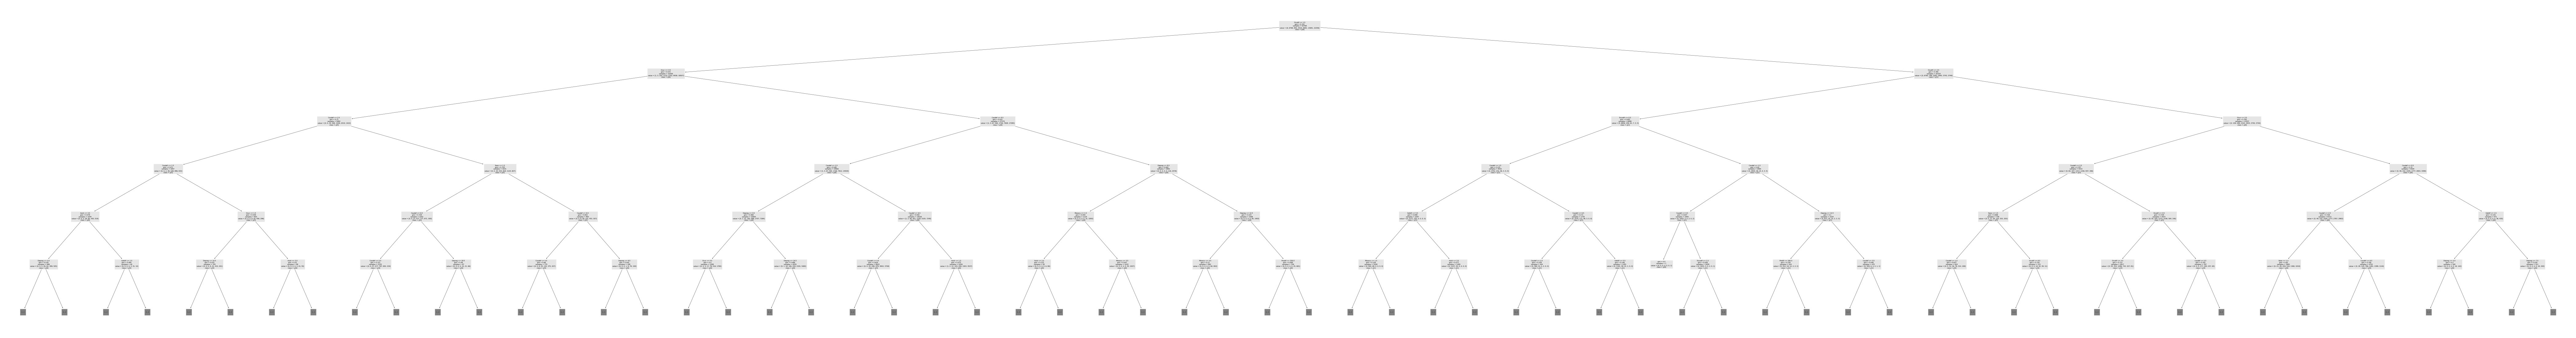

In [68]:
from sklearn.tree import export_text
fig = plt.figure(figsize=(150,20))
_ = tree.plot_tree(clf_age_range_1, feature_names=X_train.columns,class_names=True, max_depth=5) 
# export_text(clf_age_range_1)

In [69]:
fig.savefig("decistion_tree_1.png")

## Predicción con el modelo
Procederemos a la prediccion con el modelo

In [70]:
timestamp1 = time.time()
y_pred_age_ranges_decision_tree = clf_age_range_1.predict(X_test)
timestamp2 = time.time()
print("Se tomo  %.2f segundos en predecir los rangos de edades" % (timestamp2 - timestamp1))

Se tomo  0.01 segundos en predecir los rangos de edades


### Calculo de Resultados y presición
A continuación procederemos a calcular el acierto de nuestro modelo.
Luego procederemos a ver donde es que mas fallo y donde acerto mas con nuestra matriz de confusión.

In [71]:
accuracy_model_1 = accuracy_score(y_test, y_pred_age_ranges_decision_tree)
print("% de actierto de nuestro modelo: ", accuracy_model_1*100, "%")

% de actierto de nuestro modelo:  63.614288228048565 %


In [72]:
cm = confusion_matrix(y_test,y_pred_age_ranges_decision_tree)
print('Matriz de confusión: \n',cm)

Matriz de confusión: 
 [[   0    1    1    0    0    0    0]
 [   4 3620   53   43   10    1    4]
 [   2   88  136  125   52   30   22]
 [   1   51   81  966  350  281  152]
 [   0   12   54  465 1326  681  474]
 [   0    7   40  347  811 3593 2445]
 [   0    7   25  221  648 2750 8435]]


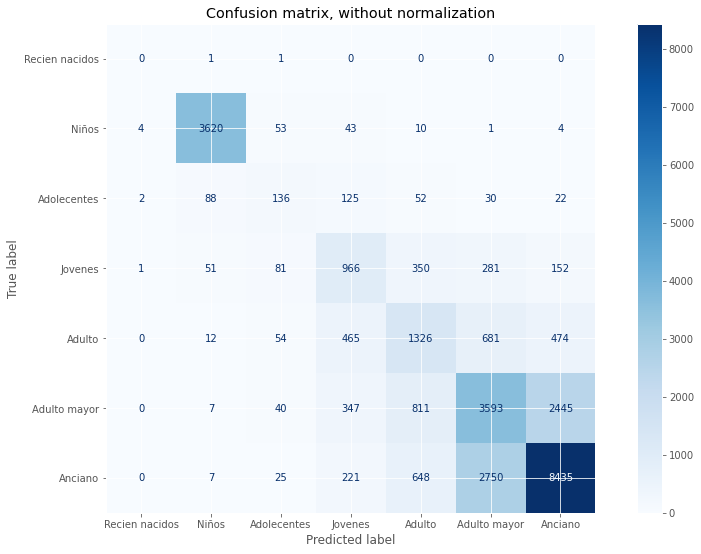

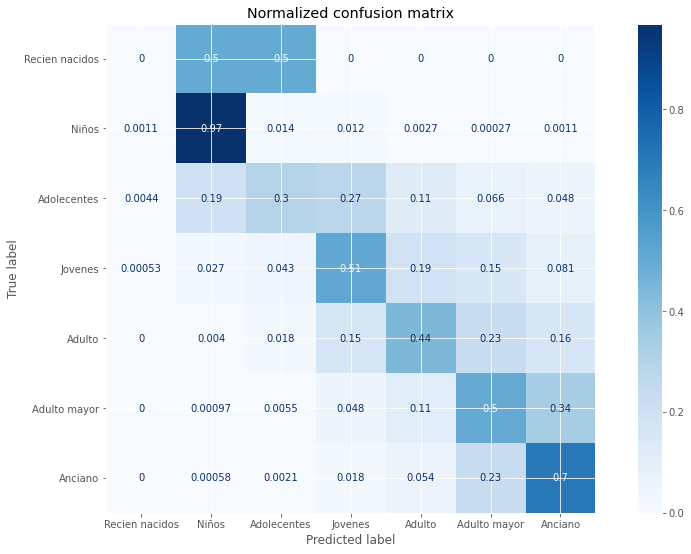

In [73]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_age_range_1, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 display_labels=dictionaries_age_array,
                                 normalize=normalize)
    disp.ax_.set_title(title)

In [74]:
data.Predif.sort_values(ascending=False)

72159    723.0
72156    723.0
72157    723.0
72136    720.0
72116    340.0
         ...  
71066      0.0
71065      0.0
71064      0.0
71063      0.0
2          0.0
Name: Predif, Length: 81184, dtype: float64

## Discusión de la matriz de confusión y resultados

### Accuracy del modelo
Nuestro modelo presento una presición del 63.62% no siendo excelente pero siendo decente para el modelo que hemos elegido. Aunque definitivamente es algo que se puede mejorar.
### Árbol generado
El arbol nos muestra que el primer valor que determina la prediccion de un fallecido es la causa de difuncion asi que podemos asumir que hay una vuerte relacion entre la edad y la causa de enfermedad entre las 10 mas comunes.
Esto nos puede servir para determinar que es un factor importante a tomar en cuenta cuando alguna persona con mezcla (edad + enfermedad que presente riesgo) a esa edad sea evaluada y tambien esta información se puede empezar a tomar gracias a esto.
Ademas observamos que la ramificación es cuando la enfermedad pertence a las primeras dos y la otra ramificación es las restantes.
Hay dos enferemedades que determinan bastante dentro de nuestro arbol.
Nuestro arbol decidimos asignarle una profundidad máxima en sus ramas de 5 debido a que era muy pesado plottear el arbol completo pero sentimos que esta profundidad nos permitira tener como minimo 5 valores realmente importantes dentro de la relación de edad - defunción.
Dentro de nuestro arbol de desición en el primer rango es tan grande que el arbol decide volver a ramificar en base de la causa esto siempre dentro de la ramificación de la izquierda.
Y luego ya pasamos a otros valores diferentes a la causa que serian la ocurrencia y el departamento nos llama la atencion que el departamento sea un factor importante para la prediccion de la edad esto puede ser debido a una de las enfermedades dentro de esta ramificación es Nuemonia y como habiamos visto en nuestros clusters habia una relacion fuerte de esta enfermedad con los departamentos frios ademas que el sitio de ocurrencia es un factor practicamente separando a cuando es en una casa de salud o un domicilio lo cual tiene sentido.
Dentro de estas causas incluyendo ahora la diabetes observamos que el sexo es un factor para determinar la edad de defuncion.
Por el otro lado observamos que nuestro arbol nos indica que el mes de ocurrencia puede ser un factor seguido de la escolaridad y la etnia del difunto.
Esto nos hace pensar que probablemente en el siguiente nivel podriamos observar la ocupacion justo debajo de la escolaridad o incluso debajo de la etnia al ser concientes que en Guatemala existe un problema de discriminación.
Tambien nos fijamos que hay enfermedades 


# Matriz de confusión
Dentro de nuestra matriz de confusión normalizada podemos observar que nuestras predicciones de los niños y ancainos fueron los mas acertados con 97 y 70 % de acierto respectivamente. 
Por el otro lado observamos que los adolecentes tuvieron el mas bajo promedio de aciertos siendo confundidos en su mayoria con niños y con jovenes esto pudo haber pasado por dos razones nuestro rango no esta bien establecido o la muestra no es lo suficientemente confiable para poder predecir esto. Para corregirlo podemos estratificar los datos asegurandonos que todos tengan de cada uno de los grupos en un procentaje.
El resto de los grupos que obtuvimos obseravamos en promedio que alrededor de un 50% de acierto se tuvo.
Como dato importante podemos notar que los recien nacidos tuvieron bastante confusión con los adultos mayores consideramos que esto puede ser al delimitar el rango en un valor unicamente (0 años) o bien puede ser que los valores en este data set no muestren tener una relacion realmente con este grupo y no haya factores para predecir la muerte de un recien nacido.

# Random Forest
Realizaremos un modelo de random forest para ver si con mas deiscion trees podemos llegar a un mejor resultado y si si donde fue que el modelo mejoro en base de nuestras matrices de confusión.

In [75]:
rf = RandomForestClassifier(n_estimators = 1000)

# Procederemos a entrenar el modelo

In [76]:
timestamp1 = time.time()
rf.fit(X_train, y_train)
timestamp2 = time.time()
print("Se tomo  %.2f segundos en entrenar el random forest" % (timestamp2 - timestamp1))

Se tomo  40.04 segundos en entrenar el random forest


Como primer diferencia notamos ya el tiempo entre ambos vario drasticamente el primer modelo (desicion tree) no tomo ni un segundo meintras el random forest tomo 40.04 segundos en entrenarlo definitivamente es mas pesado.

## Predicción con el modelo random forest
Procederemos a la prediccion con el modelo de random forest

In [77]:
timestamp1 = time.time()
pred_y_random_forest = rf.predict(X_test)
timestamp2 = time.time()
print("Se tomo  %.2f segundos en predecir el modelo de random forest" % (timestamp2 - timestamp1))

Se tomo  9.88 segundos en predecir el modelo de random forest


### Calculo de Resultados y presición

In [78]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Reporte de clasificacion: ", classification_report(y_test,pred_y_random_forest))
print("Accuracy de nuestro modelo: ", accuracy_score(y_test, pred_y_random_forest))

Reporte de clasificacion:                precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.96      0.98      0.97      3735
           2       0.48      0.26      0.34       455
           3       0.53      0.51      0.52      1882
           4       0.50      0.42      0.46      3012
           5       0.52      0.50      0.51      7243
           6       0.72      0.79      0.75     12086

    accuracy                           0.67     28415
   macro avg       0.53      0.49      0.51     28415
weighted avg       0.66      0.67      0.67     28415

Accuracy de nuestro modelo:  0.6717930670420552


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [79]:
cm = confusion_matrix(y_test,pred_y_random_forest)
print('Matriz de confusión: \n',cm)

Matriz de confusión: 
 [[   0    2    0    0    0    0    0]
 [   0 3660   33   27    7    2    6]
 [   0   87  118  139   56   28   27]
 [   0   42   48  963  341  309  179]
 [   0    7   19  388 1271  755  572]
 [   0    4   19  213  556 3588 2863]
 [   0    7   11   80  322 2177 9489]]


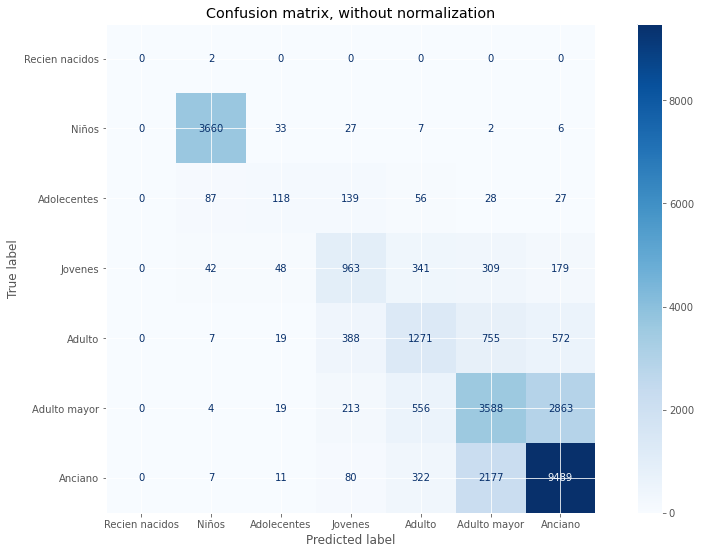

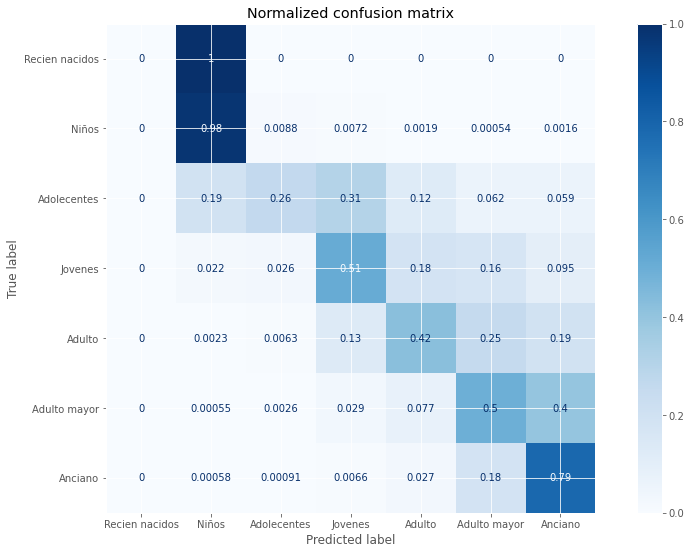

In [80]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(rf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 display_labels=dictionaries_age_array,
                                 normalize=normalize)
    disp.ax_.set_title(title)

## Discusión de la matriz de confusión y resultados

### Accuracy del modelo
Lo primero que podremos observar es una mejora en nuestro accuracy de un 4%. No fue algo realmente significativo para tener una muestra de 1000 arboles dentro de nuestro random forest de claisficación.
El modelo presento un 67.17% de acierto.
### Árbol generado
Este modelo no podemos mostrar los arboles ya que son 1000 y es en base al promedio.

## Resultados de la matriz de confusión
### Mejoras
Donde observamos mejoras es en la cantidad de niños acertados miramos un incremento del 96% -> 98% la diferencia de los resultados en esto orivienen en que ya no hubo confusion con Recien nacidos y Adolecentes.

Tambien los ancianos 70% -> 79% incrementaron un 9%. Esta mejora es dada en que hubo menor confusión en un 5% con los adultos mayores.

### Empeoramientos
Los adolectentes si se vieron afectados de un 30% a un 26%
La prediccion  de los Jovenes, Adultos, y adultos mayores vieron una perdida en su prediccion no muy singificativa la mayoria de un 1 % pero llama la atencion.

#### Diferencias
Podemos observar que  con los adultos mayores se tuyo una menor confusion con los adultos en general pero mas con los ancianos.
Tambien en el grupo de jovenes neustro modelo logro disernir mejor entre adolecentes y jovenes pero empeoro con los adultos.
Esto podria ser debido a overfitting y generalización.

## Resultados aislados
Viendo nuestra matriz miramos justamente que la concentración de datos esta en los niños, los adultos mayores y los ancianos.
Por ejemplo los recien nacidos apenas hay 3 dentro de la muestra y ni uno fue bien predecido

# Estratificación y optimizacion de nuestra vairable de resultado

In [81]:
datos_stratify = data.copy()

In [82]:
print("Observamos que de recien nacidos hay: ", data[data.AgeRange == 0].shape[0], " elementos en el data set")
print("Observamos que de niños hay: ", data[data.AgeRange == 1].shape[0], " elementos en el data set")
print("Observamos que de adolecentes hay: ", data[data.AgeRange == 2].shape[0], " elementos en el data set")
print("Observamos que de jovenes hay: ", data[data.AgeRange == 3].shape[0], " elementos en el data set")
print("Observamos que de adultos hay: ", data[data.AgeRange == 4].shape[0], " elementos en el data set")
print("Observamos que de adulto mayor hay: ", data[data.AgeRange == 5].shape[0], " elementos en el data set")
print("Observamos que de ancainos hay: ", data[data.AgeRange == 6].shape[0], " elementos en el data set")

Observamos que de recien nacidos hay:  8  elementos en el data set
Observamos que de niños hay:  10503  elementos en el data set
Observamos que de adolecentes hay:  1305  elementos en el data set
Observamos que de jovenes hay:  5398  elementos en el data set
Observamos que de adultos hay:  8704  elementos en el data set
Observamos que de adulto mayor hay:  20924  elementos en el data set
Observamos que de ancainos hay:  34342  elementos en el data set


In [83]:
# data.loc[data.AgeRange == 1] = 0
# data.loc[data.AgeRange == 3] = 1
# data.loc[data.AgeRange == 2] = 1
# data.loc[data.AgeRange == 4] = 2
# data.loc[data.AgeRange == 5] = 2
# data.loc[data.AgeRange == 6] = 2

In [84]:
nacidos = datos_stratify[datos_stratify.AgeRange == 0]
niños = datos_stratify[datos_stratify.AgeRange == 1]
adolecentes = datos_stratify[datos_stratify.AgeRange == 2]
jovenes = datos_stratify[datos_stratify.AgeRange == 3]
adultos = datos_stratify[datos_stratify.AgeRange == 4]
adultos_mayores = datos_stratify[datos_stratify.AgeRange == 5]
ancianos = datos_stratify[datos_stratify.AgeRange == 6]
#Procederemos a crear muestras proporcionalmente iguales
#Proporcion 70 -30

#Nacidos
nacidos_train = nacidos.sample(frac=0.7)
nacidos_test = nacidos.drop(nacidos_train.index)

#Niños
niños_train = niños.sample(frac=0.7)
niños_test = niños.drop(niños_train.index)

#Niños
adolecentes_train = adolecentes.sample(frac=0.7)
adolecentes_test = adolecentes.drop(adolecentes_train.index)

#Jovenes
jovenes_train = jovenes.sample(frac=0.7)
jovenes_test = jovenes.drop(jovenes_train.index)

#Adultos
adultos_train = adultos.sample(frac=0.7)
adultos_test = adultos.drop(adultos_train.index)

#Adultos
adultos_mayores_train = adultos_mayores.sample(frac=0.7)
adultos_mayores_test = adultos_mayores.drop(adultos_mayores_train.index)

#Ancianos
ancianos_train = ancianos.sample(frac=0.7)
ancianos_test = ancianos.drop(ancianos_train.index)

In [85]:
y_train = niños_train.pop('AgeRange').append(jovenes_train.pop('AgeRange')).append(adultos_train.pop('AgeRange')).append(ancianos_train.pop('AgeRange')).append(nacidos_train.pop('AgeRange')).append(adolecentes_train.pop('AgeRange')).append(adultos_mayores_train.pop('AgeRange'))

y_test = niños_test.pop('AgeRange').append(jovenes_test.pop('AgeRange')).append(adultos_test.pop('AgeRange')).append(ancianos_test.pop('AgeRange')).append(nacidos_test.pop('AgeRange')).append(adolecentes_test.pop('AgeRange')).append(adultos_mayores_test.pop('AgeRange'))

X_train = niños_train.append(jovenes_train).append(adultos_train).append(ancianos_train).append(nacidos_train).append(adolecentes_train).append(adultos_mayores_train)
X_test = niños_test.append(jovenes_test).append(adultos_test).append(ancianos_test).append(nacidos_test).append(adolecentes_test).append(adultos_mayores_test)

In [86]:
y_test.describe()

count    13288.000000
mean         4.652694
std          1.630691
min          0.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          6.000000
Name: AgeRange, dtype: float64

Con el codigo de arriba nos aseguramos que el 30% de cada una de las respectivas muestras se encuentren en el test set y el 70 porciento en los train set todos teniendo una cantidad proporcional igual.

# Creando modelo arbol de desicion (con data estratificada)

In [87]:
clf_age_range_2 = tree.DecisionTreeClassifier()

## Entrendando el modelo

In [88]:
timestamp1 = time.time()
clf_age_range_2.fit(X_train, y_train)
timestamp2 = time.time()
print("Se tomo  %.2f segundos en entrenar el arbol de desición" % (timestamp2 - timestamp1))

Se tomo  0.16 segundos en entrenar el arbol de desición


## Predicción con el modelo
Para poder ver diferencias con el modelo no estratificado

In [89]:
timestamp1 = time.time()
y_pred_age_ranges_decision_tree_strat = clf_age_range_2.predict(X_test)
timestamp2 = time.time()
print("Se tomo  %.2f segundos en predecir los rangos de edades" % (timestamp2 - timestamp1))

Se tomo  0.01 segundos en predecir los rangos de edades


### Calculo de Resultados y presición

In [90]:
accuracy_model_1_strat = accuracy_score(y_test, y_pred_age_ranges_decision_tree_strat)
print("% de actierto de nuestro modelo: ", accuracy_model_1_strat*100, "%")

% de actierto de nuestro modelo:  53.43166767007826 %


In [91]:
cm = confusion_matrix(y_test,y_pred_age_ranges_decision_tree_strat)
print('Matriz de confusión: \n',cm)

Matriz de confusión: 
 [[   0    1    1    0    0    0    0]
 [   0 1449   46   26    4    1    5]
 [   0   42   25   49   26   22   17]
 [   0   20   50  302  271  174  115]
 [   0   11   36  274  427  460  345]
 [   0    6   20  188  497 1409 1490]
 [   1    8   17  100  329 1536 3488]]


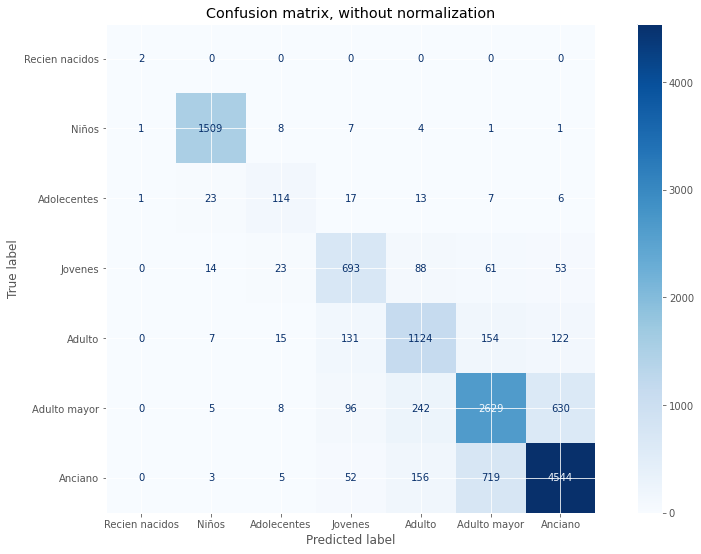

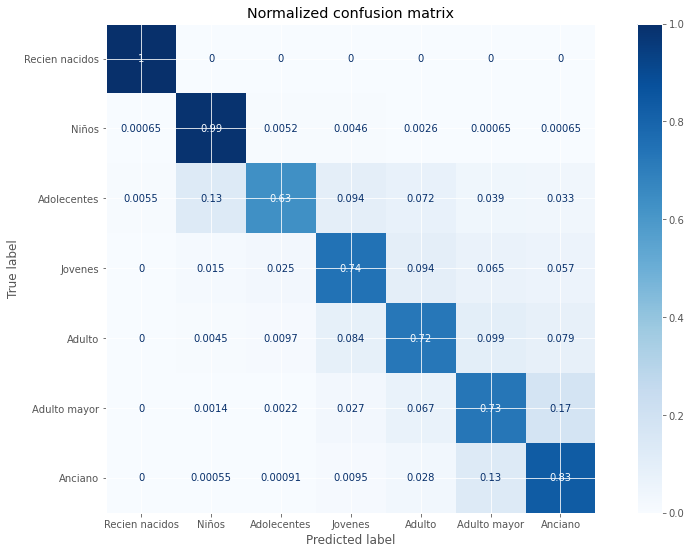

In [92]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_age_range_1, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 display_labels=dictionaries_age_array,
                                 normalize=normalize)
    disp.ax_.set_title(title)

## Discusión de la matriz de confusión y resultados

### Accuracy del modelo
Nuestro modelo en presicion decayo un poco podemos observar que bajo casi un 10% y viendolo unicamente desde este punto la estratificación no fue de gran ayuda. Pero falta examinar la matriz de confusión para ver realmente que paso

### Matriz de confusión
Cuando visualisamos nuestra matriz de confusión podemos observar que efectivamente hemos tenido practicamente una mejora en la predicción en todos nuestros labels. Creemos que nuestro accuracy puede verse afectado por que la distribución de la muestra cambio y en el modelo sin estratificar casi todos eran ancianos y ahi hubo un buen % de acierto.
Dos modelos que podemos observar a simple vista que mejoraron de gran manera fue los recien nacidos con un 100% de exito aunque fue una muestra unicamente de 2 niños, el otro seria los adolecentes mejorando de un 30% a un 63% reduciendo en gran parte su confusión con los niños y jovenes.

### Mejoras
Este modelo mejoro en todos los aspectos posibles dentro de la matriz de confusión. Es un buen ejemplo porque no solo nos tenemos que fiar del accuracy para saber si un modelo es bueno si no una matriz de confusión nos indicara de mejor manera como se comporta el modelo con todos los casos en cuanto a la clasificación. Esto es para algoritmos de clasificación.


# Arbol generado

### Arbol generado
A continuación observamos porque solo mostramos los primeros 5 niveles del arbol a pesar que hemos limitado el valor de nuestras variables y las columnas a utilizar notamos que solo no es legible y nos otorga factores muy poco relevantes.

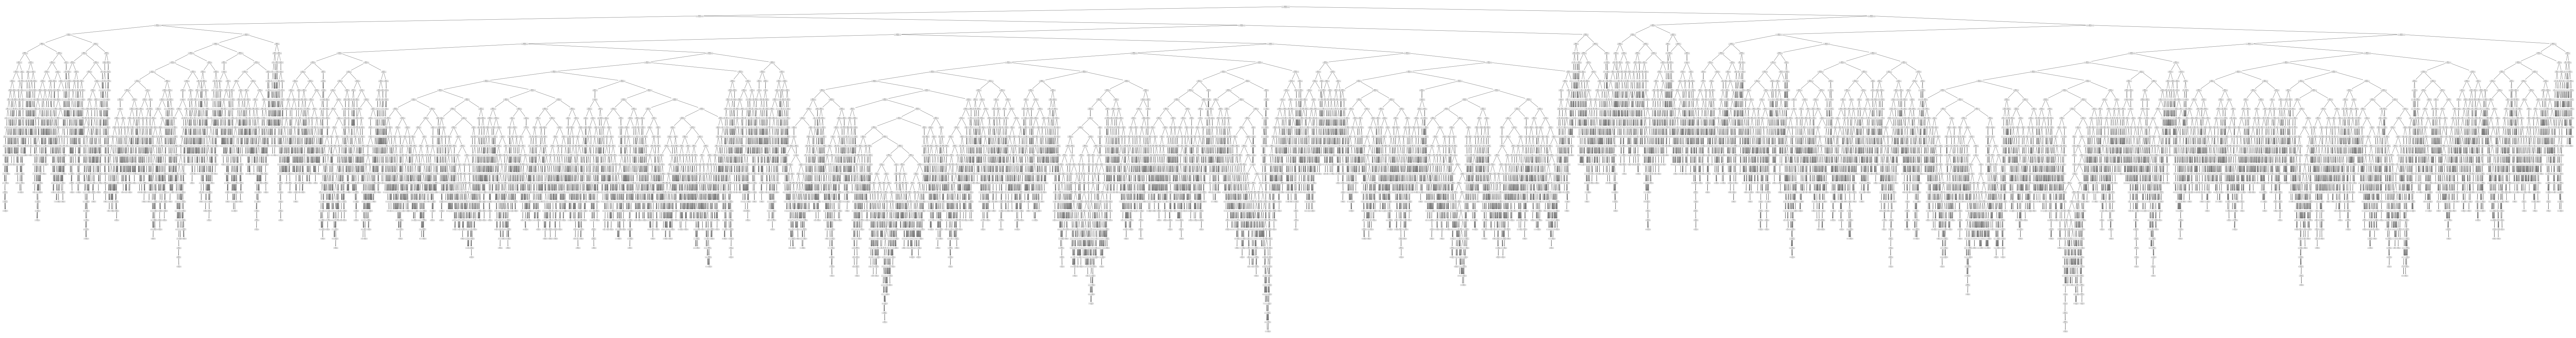

In [651]:
fig = plt.figure(figsize=(150,20))
_ = tree.plot_tree(clf_age_range_2, feature_names=X_train.columns,class_names=True) 

In [ ]:
fig.savefig("decistion_tree_full.png")

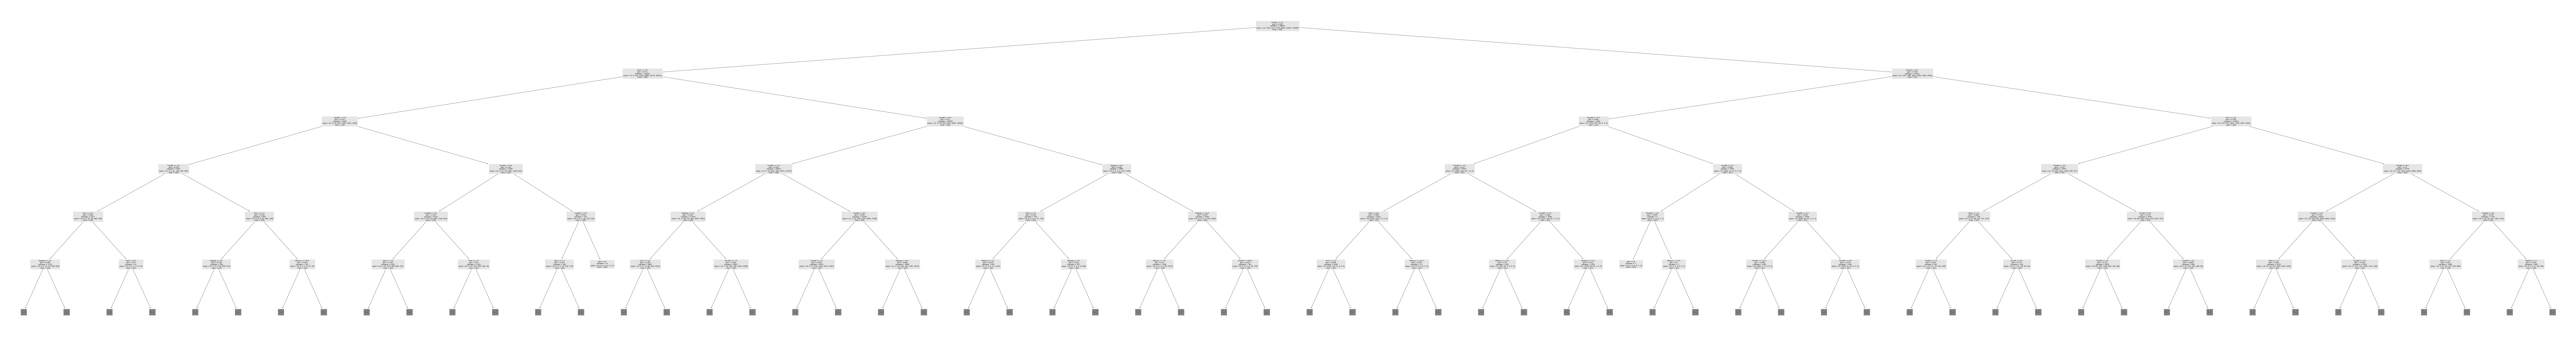

In [93]:
fig = plt.figure(figsize=(150,20))
_ = tree.plot_tree(clf_age_range_2, feature_names=X_train.columns,class_names=True, max_depth=5) 

In [94]:
fig.savefig("decistion_tree_2.png")

## Analisis del arbol generado
Dentro del arbol notamos que la primera variable ahora es la ocupación del difunto. A diferencia del arbol no estratificado donde nos mostraba que el primer valor a tomarse en cuenta era la causa aca lo notamos tambien pero con un poco menos de relevancia aunque sigue siendo relevante aparece en el tercer nivel de la ramificación izquierda.
Lo primeros que notamos es que la primera división se hace justo con peones de explotación y oficios domesticos no remunerados. De este grupo notamos que la edad en que muere segun nuestro modelo depende del sitio de ocurrencia especificamente si fue en un centro de salud u hospital o si fue en otra ubicación empezamos a notar que aca hay la causa empeiza a ser factor de si fue un infarto, diabetes o neumonia no especificada. Cuando ya es una neumonia vemos que dependen de si fue en un hospital o nada mas en un centro de salud y en un infarto depende de si fue en un hospital publico o privado o sie fue diabetes empieza ya a pesar factores como el departamento y el sexo. Del otro lado dentro de esta ramificacion notamos que factores como si fueron lesiones o muertes sin asistencia empiezan a relacionarse con el sexo. Es interesante ver como es un factor tan importante en especial para estos trabajos de explotación.
Del otro lado notamos que cuando son infantes su escolaridad depende como factor de la edad lo cual tiene sentido hay una relacion fuerte en el grado y la edad de un difunto pero a partir de esto empezamos a notar que de nuevo los infartos y neumonia empiezan a ser factores como el mes de ocurrencia como en meses mas frios esto puede afectar.
De ahi notamos que sifue en un hospital o centro medica dependiendo de si fue de nuevo un ataque, diabetes o neumonia el sexo empieza a ser un factor mientras que  si fue otra causa de muerte ya tenemos el grupo de los agricultores.

En general notamos que quienes mandan aca en estos niveles son el sitio + la ocupación + la causa de la defunción.

# Cual fue mejor?
### Random Forest vs Arbol de Clasificación
Creemos nosotros que para tener un resultado mas acertado definitivamente un random forest sera lo que mejor nos ira pero hay que recordar que este es mas caro y nos genera una collección de arboles.
### Arbol de Clasificación (estratificado) vs Arbol de Clasificación (no estratificado)
Respecto entre los dos modelos de arbol de desición generados preferimos el modelo con la data estratificada ya que su acierto esta mejor distribuido segun las matrices de confusión.
La estratificacion nos permite entrenar al modelo de una manera proporcionalmente igual y aprendiendo de todas las posibles vairables de respuesta ademas que es importante resaltar que en el caso de que no se estratifique ademas el modelo tambien podria crashear ya que si por ejemplo hay 10 bebes en el data set y ni uno aparece en el train set luego con test set habra una diferencia de niveles

## Veredicto
Para tener los mejores resultados se debe de hacer un random forest